In [1]:
import numpy as np
import pandas as pd
import cv2

In [ ]:
def mouse_callback(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDOWN:
        points.append([x,np.shape(img)[0]-y])
        print("마우스 이벤트발생, x:", x, "y:", np.shape(img)[0]-y, "클릭 :",len(points))


img = cv2.imread('gogogo.png')
aa = np.shape(img)
print(aa[0])

cv2.namedWindow('image')
cv2.setMouseCallback('image', mouse_callback)

points = []
x=[]
y=[]
number = []
num=0

while(True):

    cv2.imshow('image', img)

    k=cv2.waitKey(1)&0xFF
    if k == 27:
        for i in points:
            num += 1
            number = np.append(number, num)
            x = np.append(x, i[0])
            y = np.append(y, i[1])


        break

cv2.destroyAllWindows()
data_union = {'Contour N.o.': number,'x' :x ,'y': y}
df = pd.DataFrame(data_union)
df.to_excel('ggg.xlsx')


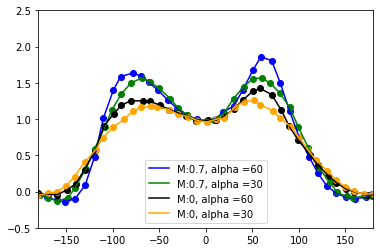

In [30]:
import matplotlib.pyplot as plt
df = pd.read_excel('ggg.xlsx')
df['x'] = (df.x- df.x.min())/(df.x.max()-df.x.min())*360-180
df['y'] = (df.y- df.y.min())/(df.y.max()-df.y.min())*2-0.14

plt.plot(df[0:37].x,df[0:37].y, c='blue', label='M:0.7, alpha =60')
plt.plot(df[37:37*2].x,df[37:37*2].y, c='green',label='M:0.7, alpha =30')
plt.plot(df[37*2:37*3].x,df[37*2:37*3].y, c='black',label='M:0, alpha =60')
plt.plot(df[37*3:37*4].x,df[37*3:37*4].y, c='orange',label='M:0, alpha =30')
plt.scatter(df[0:37].x,df[0:37].y, c='blue')
plt.scatter(df[37:37*2].x,df[37:37*2].y, c='green')
plt.scatter(df[37*2:37*3].x,df[37*2:37*3].y, c='black')
plt.scatter(df[37*3:37*4].x,df[37*3:37*4].y, c='orange')

plt.legend()
plt.ylim(-0.5,2.5)
plt.xlim(-180,180)
plt.savefig('akhhhh.png',dpi=500)